# Artificial Neural Network - Initialization of the Weights


The Artificial Neural Network (ANN) loss function is **non-convex**. The location of the global minimum or "near-global minimum" of the loss function is found by using the Gradient Descent (stochastic or mini-batch) algorithm that learns the optimal weights of an ANN.

In ANN, there exists weights between every two layers. The linear transformation of these weights and the values in the previous layers passes through a non-linear activation function (e.g., logistic sigmoid, tanh, ReLU) to produce the values of the next layer. This process happens layer to layer during forward propagation. Then, ANN uses the backpropagation algorithm to update the weights. The backpropagation works by going from the output layer to the input layer, propagating the error gradient along the way. Once the algorithm has computed the gradient of the loss function with regard to each parameter in the network, it uses these gradients to update each parameter with a Gradient Descent step.


The optimal weight values depend on the initial weight values. In this notebook we discuss the **initialization technique** for the weight parameters of an ANN.


## Initialization of the Weight Parameters

The initialization of weight parameters influence the performance of the ANN (both the convergence and accuracy).

Unlike Linear or Logistic Regression, ANN weights shouldn't be initialized with 0s. If we set all weights to 0, the derivative with respect to loss function is the same for every weight parameter. Thus, all the weights have the same values in the subsequent iteration. If we set all the weights to be zero, then all the the neurons of all the layers performs the same calculation, giving the same output and there by making the whole ANN useless. If the weights are zero, complexity of the whole ANN would be the same as that of a single neuron and the predictions would be nothing better than random. This makes the hidden neurons/units symmetric and continues for all the iterations we run. Thus, setting weights to zero makes our network no better than a linear model.


The weight matrix need to be randomly initialized with small non-zero weight values for symmetry breaking. Initial small random values ensure that the logistic sigmoid activation functions are not saturated. 


To study the weight initialization phenomenon, we perform two tasks. Our investigations are based on the **logistic sigmoid** activation function. At the end of this notebook, we provide initialization techniques for other activations functions, such as ReLU.

- Task 1: Determine the range of initial weights for the logistic sigmoid activation function
- Task 2: Experiment with various random functions for initializing weights

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1: Determine the Range of Weights for the Sigmoid Function

We generate a sequence of real numbers between -4 to +4 and pass these numbers through the logistic sigmoid function and its derivative.

We intend to find the range of the input that produces large gradient.

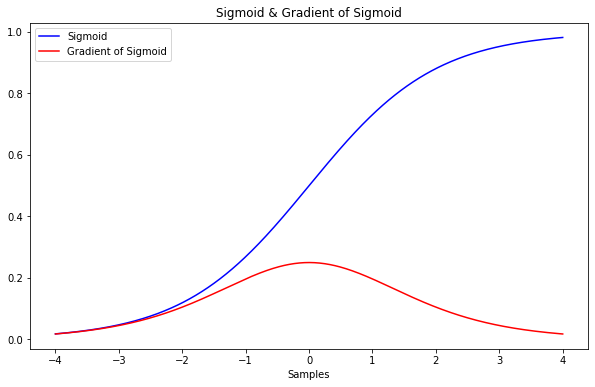

In [2]:
# Sigmoid Function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

# Gradient of Sigmoid Function
def gradientSigmoid(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Numbers between -4 to +4
numbers = np.linspace(-4.0, 4.0, num=500)

# Two arrays to store the sigmoid and gradient of sigmoid function output 
array_sigmoid, array_gradientSigmoid = [], []


for i in range(len(numbers)):
    array_sigmoid.append(sigmoid(numbers[i]))
    array_gradientSigmoid.append(gradientSigmoid(numbers[i]))
    

# Draw a plot for both the sigmoid and the gradient of sigmoid
fig = plt.figure(figsize=(10, 6))
plt.plot(numbers, array_sigmoid, "b-", label="Sigmoid")
plt.plot(numbers, array_gradientSigmoid, "r-", label="Gradient of Sigmoid")

plt.title("Sigmoid & Gradient of Sigmoid")
plt.legend(loc=2)
plt.xlabel("Samples")
plt.show()

## Task 1: Observation


We observe that if our input is away from 0, the slope of the function decreases quite fast and as a result we get a tiny gradient, and consequently tiny weight update. 

In Deep ANN (with many hidden layers) those gradients get multiplied many times during backpropagation. Gradients after many multiplications become small and stop making any influence. Thus, it is a usual practice to initialize weight parameters around zero value. This is done to ensure that we get reasonable gradients (close to 1) to train the ANN.


### What should be the Range of the Initial Values of the Weight Parameters?

The following plot of the gradient of sigmoid shows that the gradient is larger between -1 to +1.

Thus, we will define a function that initializes the weight parameters with random numbers between -1 to +1.

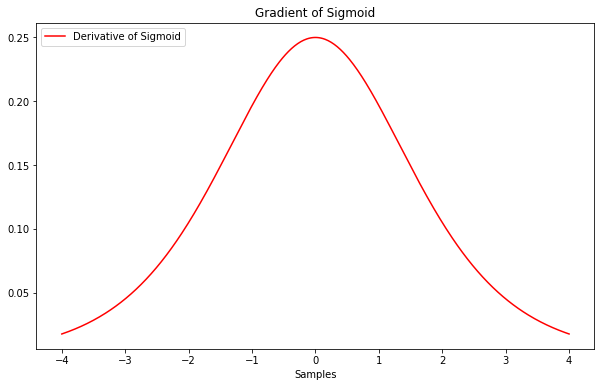

In [3]:
# Draw a plot for the gradient of sigmoid
plt.figure(figsize=(10, 6))
plt.plot(numbers, array_gradientSigmoid, "r-", label="Derivative of Sigmoid")

plt.title("Gradient of Sigmoid")
plt.legend(loc=2)
plt.xlabel("Samples")
plt.show()


## Task 2: Experiment with Various Random Functions for Initializing Weights

We experiment with five random functions.

The first function draws samples from a **uniform** distribution between 0 ~ 1.
The last four functions draw samples from a **standard normal** (0 mean & unit varuance) distribution. However, we control the **variance** (to push samples close to 0).

- Function 1: Generate samples from a “continuous uniform” distribution between 0 ~ 1.
- Function 2: Generate samples from the “standard normal” distribution (0 mean and variance 1).
- Function 3: Generate samples from the “standard normal” distribution (samples are VERY VERY VERY close to 0).
- Function 4: Generate samples from the “standard normal” distribution (samples are VERY VERY close to 0).
- Function 5: Generate samples from the “standard normal” distribution (samples are VERY close to 0).


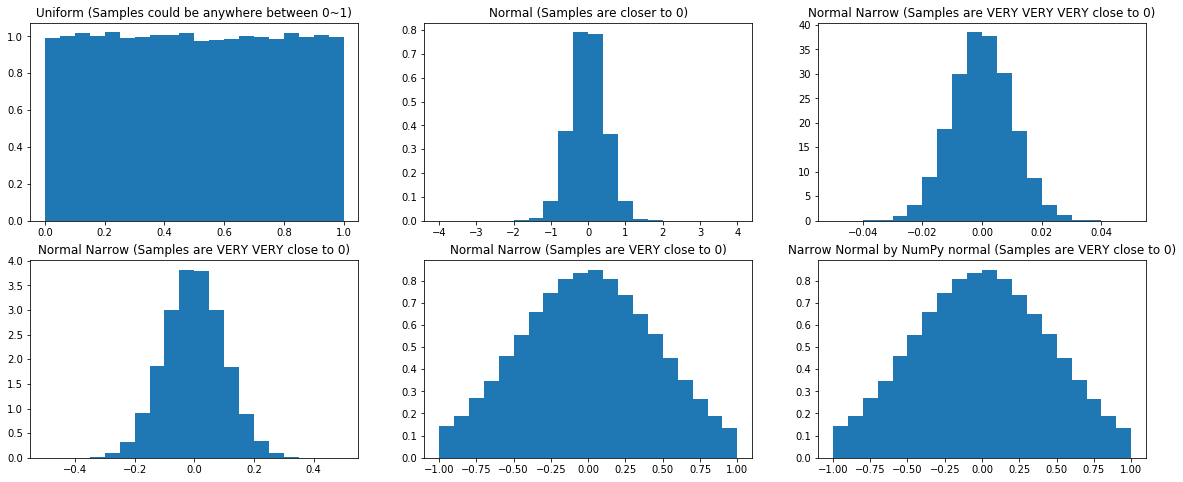

In [4]:
sample_size = 100000


# Function 1: Generate samples from a “continuous uniform” distribution between 0 ~ 1.
uniform = np.random.rand(sample_size)

# Function 2: Generate samples from the “standard normal” distribution (0 mean and variance 1).
normal = np.random.randn(sample_size)

# Function 3: Generate samples from the “standard normal” distribution (amples are VERY VERY VERY close to 0)
normal_narrow_1 = np.random.randn(sample_size)*0.01

# Function 4: Generate samples from the “standard normal” distribution (amples are VERY VERY close to 0)
normal_narrow_2 = np.random.randn(sample_size)*0.1

# Function 5: Generate samples from the “standard normal” distribution (amples are VERY close to 0)
normal_narrow_3 = np.random.randn(sample_size)*0.5

'''
We define a function using NumPy "normal" function by providing
- Mean
- Standard Deviation (square root of variance 'sigma')
'''
sigma = np.sqrt(1.0/5.0)

normal = np.random.normal(0, sigma, sample_size)


# Plot the samples from the above 5 functions
plt.figure(figsize=(20, 8))
plt.subplot(231)
pdf, bins, patches = plt.hist(uniform, bins=20, range=(0, 1), density=True)
plt.title('Uniform (Samples could be anywhere between 0~1)')

plt.subplot(232)
pdf, bins, patches = plt.hist(normal, bins=20, range=(-4, 4), density=True)
plt.title('Normal (Samples are closer to 0)')

plt.subplot(233)
pdf, bins, patches = plt.hist(normal_narrow_1, bins=20, range=(-0.05, 0.05), density=True)
plt.title('Normal Narrow (Samples are VERY VERY VERY close to 0)')


plt.subplot(234)
pdf, bins, patches = plt.hist(normal_narrow_2, bins=20, range=(-0.5, 0.5), density=True)
plt.title('Normal Narrow (Samples are VERY VERY close to 0)')


plt.subplot(235)
pdf, bins, patches = plt.hist(normal_narrow_3, bins=20, range=(-1, 1), density=True)
plt.title('Normal Narrow (Samples are VERY close to 0)')

plt.subplot(236)
pdf, bins, patches = plt.hist(normal_narrow_3, bins=20, range=(-1, 1), density=True)
plt.title('Narrow Normal by NumPy normal (Samples are VERY close to 0)')
plt.show()

## Task 2: Observation

We observe that samples generated from the uniform distribution could be far away from 0. Thus, weight values initialized with uniform distribution could create very small gradient (weights that are far away from 0). Hence, it is unsuitable for weight initialization.


Among the four standard normal distributions, the last three seem better.

- 2nd Plot (Standard Normal): Variance is large. Thus, the range of values is too wide (far away from 0, though mostly centered around 0).

- 3rd Plot (Narrow Standard Normal): Variance is too small. Thus, the range of values is too narrow (very close 0, hence most of the weight values would be same).

Therefore, we need to choose the range of samples in between these two extremes (between the 2nd and 3rd plot).

The main idea here is to define the weight initializing function using a 0 mean normal distribution with a **static variance** smaller than 1.


### Sophisticated Initialization Functions

Below we will see that better initialization functions can be defined by using **dynamic variance**. 

The variance of the weight initialization function would be controlled by the size of the **input and output layers**.


# Weight Initialization for Deep ANN


Deep ANNs suffer from an ugly problem known as the **vanishing gradients** problem. In deep ANN, gradients often get smaller and smaller as the algorithm progresses down to the lower layers. As a result, the Gradient Descent update leaves the lower layers' connection weights virtually unchanged, and training never converges to a good solution. 

In some cases, the opposite can happen: the gradients can grow bigger and bigger until layers get insanely large weight updates and the algorithm diverges. This is the **exploding gradients** problem, which surfaces in recurrent neural networks. 

        More generally, deep ANNs suffer from **unstable gradients**: different layers may learn at widely different speeds.


There are two standard weight initialization techniques (for two types of activation functions) for alleviating the unstable gradient problem.
- Activation Function: logistic, tanh, softmax
- Activation: ReLU


### Activation Function: logistic, tanh, softmax

**Xavier initialization or Glorot initialization**: Glorot and Bengio propose a way to significantly alleviate the unstable gradients problem.

http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf

They point out that we need the signal to flow properly in both directions: in the forward direction when making predictions, and in the reverse direction when backpropagating gradients. We don’t want the signal to die out, nor do we want it to explode and saturate. For the signal to flow properly, the authors argue that we need the variance of the outputs of each layer to be equal to the variance of its inputs, and we need the **gradients to have equal variance** before and after flowing through a layer in the reverse direction. 

To explain this phenomenon, Geron used an analogy:

If you set a microphone amplifier’s knob too close to zero, people won’t hear your voice, but if you set it too close to the max, your voice will be saturated and people won’t understand what you are saying. Now imagine a chain of such amplifiers: they all need to be set properly in order for your voice to come out loud and clear at the end of the chain. Your voice has to come out of each amplifier **at the same amplitude** as it came in.


It is actually not possible to guarantee that the **gradients to have equal variance** before and after flowing through a layer in the reverse direction unless the layer has an equal number of inputs and neurons (these numbers are called the fan-in and fan-out of the layer).

Glorot and Bengio proposed a good compromise that has proven to work very well in practice: the connection weights of each layer must be initialized randomly as described below, where $fan_{avg} = (fan_{in} + fan_{out})/2$. 


- Normal distribution with mean 0 and variance $\sigma^2 = \frac{1}{fan_{avg}}$

Python Functions:
1. $W = np.random.randn(fan_{in},fan_{out})*np.sqrt(\frac{1}{fan_{avg}})$
2. $W = np.random.normal(0, np.sqrt(\frac{1}{fan_{avg}}), (fan_{in}, fan_{out}))$


- Uniform distribution between -r and +r, with $r = \sqrt(\frac{3}{fan_{avg}})$





### Activation Function: ReLU

**He initialization**: The He initialization strategy for the ReLU activation function (and its variants, including the ELU activation) initializes the weights by keeping in mind the size of the **previous layer ($fan_{in}$)**. 

It helps in attaining a global minimum of the loss function faster and more efficiently. The weights are still random but differ in range depending on the size of the previous layer of neurons. This provides a controlled initialization hence the faster and more efficient gradient descent.

https://arxiv.org/abs/1502.01852

- Normal distribution with mean 0 and variance $\sigma^2 = \frac{2}{fan_{in}}$

Python Function:
1. $W = np.random.randn(fan_{in},fan_{out})*np.sqrt(\frac{2}{fan_{in}})$
2. $W = np.random.normal(0, np.sqrt(\frac{2}{fan_{in}}), (fan_{in}, fan_{out}))$

       














